In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
# Select correct columns
features = ['TEMPERATURE_DIFF', 'HEART_RATE_DIFF_REL', 'OXYGEN_SATURATION_DIFF', 'RESPIRATORY_RATE_DIFF_REL']
target = 'ICU'

In [4]:
# Clean missing values
df_clean = df[features + [target]].dropna()


In [5]:
# Normalize input features
scaler = MinMaxScaler()
X = scaler.fit_transform(df_clean[features])
y = df_clean[target].values

In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Build ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - loss: 0.6814 - val_accuracy: 0.7802 - val_loss: 0.6190
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.7661 - loss: 0.6110 - val_accuracy: 0.7802 - val_loss: 0.5226
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.7533 - loss: 0.5434 - val_accuracy: 0.7802 - val_loss: 0.4951
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.7444 - loss: 0.5290 - val_accuracy: 0.7692 - val_loss: 0.4893
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.7760 - loss: 0.5062 - val_accuracy: 0.7802 - val_loss: 0.4832
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.7820 - loss: 0.4928 - val_accuracy: 0.7802 - val_loss: 0.4819
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.7721 - loss: 0.4982 - val_accuracy: 0.7802 - val_loss: 0.4811
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.7748 - loss: 0.4939 - val_accuracy: 0.78

In [11]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n ANN Test Accuracy: {accuracy:.4f}, Loss: {loss:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7305 - loss: 0.5570 

 ANN Test Accuracy: 0.7445, Loss: 0.5403


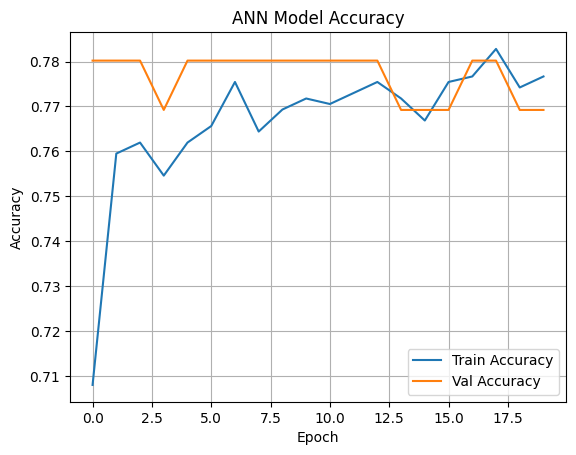

In [12]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("ANN Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()